# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Overivew

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
df.duplicated().any()

True

In [7]:
print("The shape of dataset Before removing duplicates", df.shape)
df = df.drop_duplicates()
print("The shape of dataset After removing Duplicates", df.shape)

The shape of dataset Before removing duplicates (301, 9)
The shape of dataset After removing Duplicates (299, 9)


In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#Converting to categorical variables
cols = ['Fuel_Type','Seller_Type','Transmission','Owner']
for col in cols:
    df[cols] = df[cols].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       299 non-null    object  
 1   Year           299 non-null    int64   
 2   Selling_Price  299 non-null    float64 
 3   Present_Price  299 non-null    float64 
 4   Kms_Driven     299 non-null    int64   
 5   Fuel_Type      299 non-null    category
 6   Seller_Type    299 non-null    category
 7   Transmission   299 non-null    category
 8   Owner          299 non-null    category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 15.7+ KB


### Outliers: Outliers are data points that significantly deviate from the rest of the data. 
Handling outliers can be done using techniques like:
#### Detection: Outliers can be detected using statistical methods like Z-score or IQR (Interquartile
Range) and visualizations like box plots.
#### Transformation: Transforming data using techniques like logarithmic transformation or
#### winsorization (capping extreme values) can help reduce the impact of outliers.
#### Deletion: In some cases, outliers can be removed if they are caused by data entry errors or have a
significant impact on the analysis.
#### It is crucial to carefully analyze and handle missing values and outliers, as they can significantly affect the
analysis and performance of machine learning models.

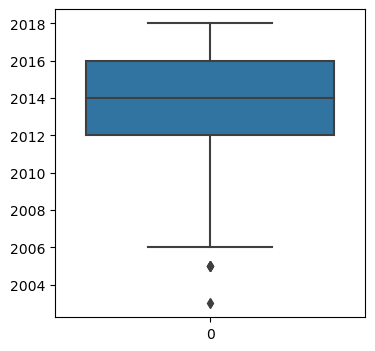

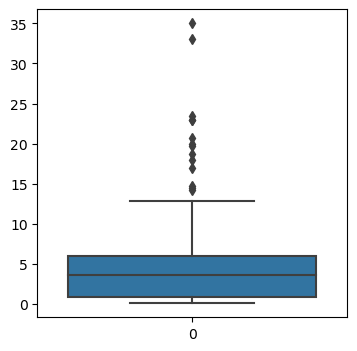

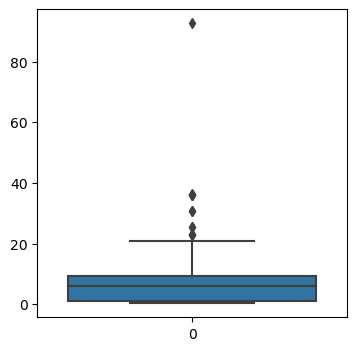

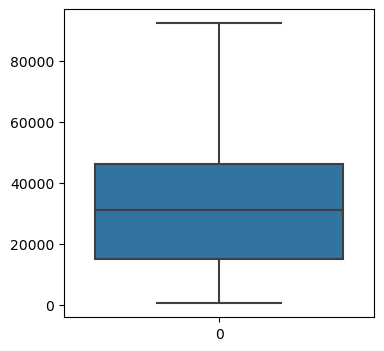

In [61]:
columns_to_plot = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
def boxplot(data):
    for col in columns_to_plot:
        plt.figure(figsize=(4,4))
        sns.boxplot(data=data[col])
        plt.show()
boxplot(df)

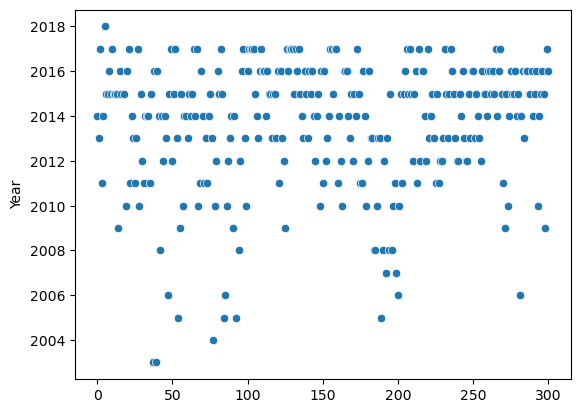

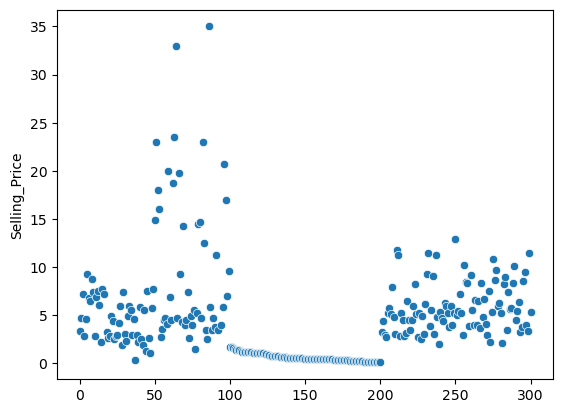

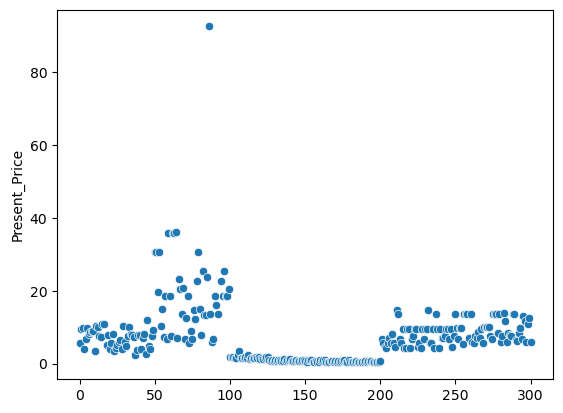

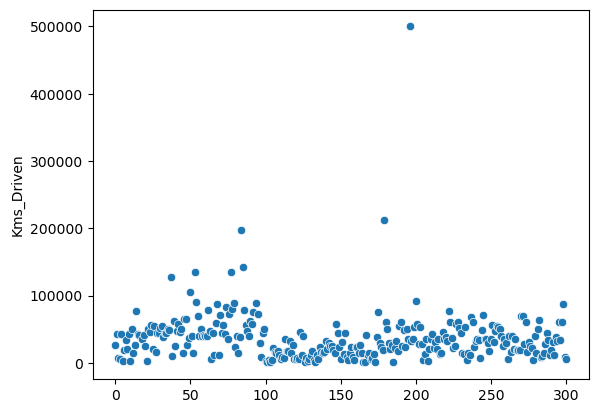

In [12]:
columns_to_plot = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
def boxplot(data):
    for col in columns_to_plot:
        sns.scatterplot(data=data[col])
        plt.show()
boxplot(df)

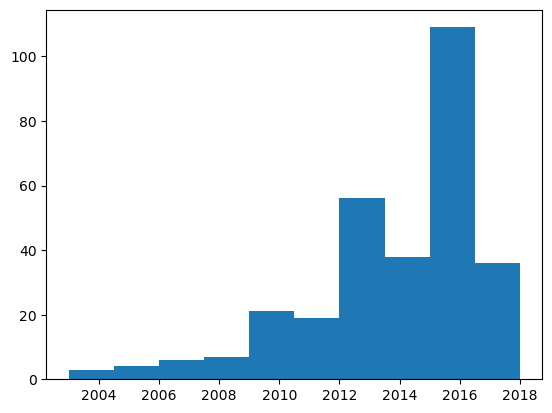

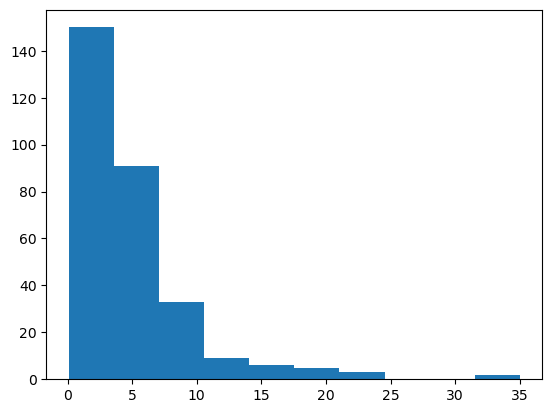

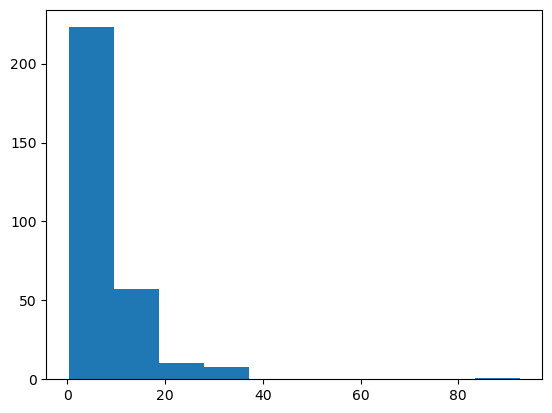

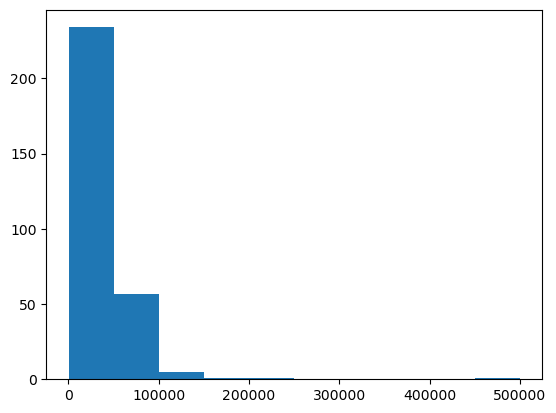

In [13]:
columns_to_plot = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
def boxplot(data):
    for col in columns_to_plot:
        plt.hist(x=data[col])
        plt.show()
boxplot(df)

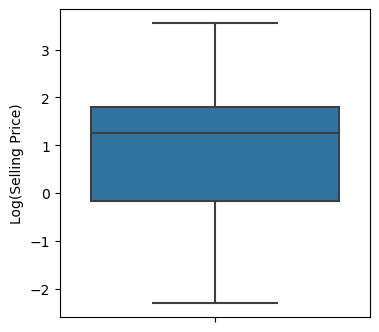

In [14]:
df['Log_Selling_Price'] = np.log(df['Selling_Price'])
plt.figure(figsize=(4, 4))
sns.boxplot(df, y=df['Log_Selling_Price'])
plt.ylabel('Log(Selling Price)')
plt.show()

# Log Transformation for Handling Outliers - Documentation

## Introduction
In our data preprocessing and feature engineering pipeline, we applied a log transformation to certain numerical features. This documentation explains the rationale behind this preprocessing step and its benefits.

## Handling Outliers
Outliers are data points that significantly deviate from the typical pattern in a dataset. They can adversely affect the performance of machine learning models, particularly those sensitive to the scale of features, like linear regression.

## Why Log Transformation?
Logarithmic transformation is a commonly used technique for handling outliers in numerical data. It offers several advantages:

1. **Normalization:** Logarithmic transformation helps normalize the distribution of data. When data follows a skewed or long-tailed distribution, taking the logarithm of the values compresses the high values and stretches the low values, resulting in a more symmetric distribution.

2. **Reduction of Variance:** Outliers often exhibit high variance. Log transformation can reduce the impact of extreme values, making the data more homogeneous and reducing the influence of outliers on the model.

3. **Linearization:** In some cases, log transformation can make relationships between variables more linear. This can be particularly useful when applying linear regression or other models that assume linearity.

4. **Stabilization:** Logarithmic transformation can stabilize the variance, making the data more suitable for models that assume constant variance (homoscedasticity).

## When to Apply Log Transformation
Log transformation is typically applied to features that exhibit right-skewed (positively skewed) distributions, where most values are concentrated toward the lower end, and a few extreme values are present. It is not necessary for all features and should be applied judiciously based on the characteristics of the data.

## Conclusion
By applying a log transformation to specific numerical features in our data preprocessing pipeline, we have successfully addressed outliers, normalized the data, and improved the suitability of certain features for modeling. This preprocessing step contributes to the overall robustness and performance of our machine learning models.

## Next Steps
- Continue to monitor the impact of the log transformation on model performance.
- Consider additional preprocessing steps or transformations for other features as needed.
- Document and maintain the data preprocessing pipeline for transparency and reproducibility.


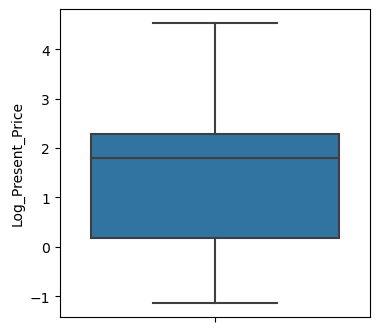

In [15]:
df['Log_Present_Price'] = np.log(df['Present_Price'])
plt.figure(figsize=(4, 4))
sns.boxplot(df, y=df['Log_Present_Price'])
plt.ylabel('Log_Present_Price')
plt.show()

In [16]:
q1 = df.Kms_Driven.quantile(0.25)
q3 = df.Kms_Driven.quantile(0.75)
iqr = q3-q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
df= df[(df['Kms_Driven'] >= lower_bound) & (df['Kms_Driven'] <= upper_bound)]
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Log_Selling_Price,Log_Present_Price
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.208960,1.720979
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.558145,2.255493
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1.981001,2.287471
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.047319,1.423108
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.526056,1.927164
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.251292,2.451005
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.386294,1.774952
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1.208960,2.397895
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2.442347,2.525729


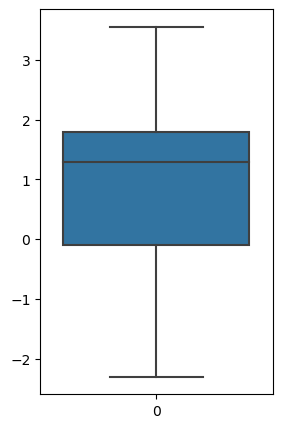

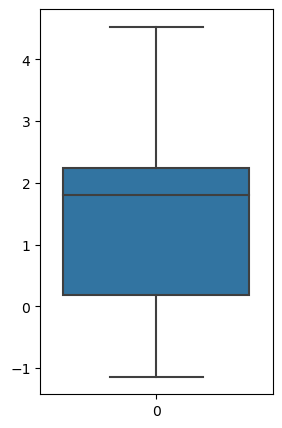

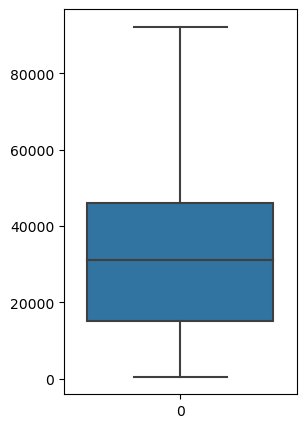

In [17]:
columns_to_plot = [ 'Log_Selling_Price', 'Log_Present_Price', 'Kms_Driven']
def boxplot(data):
    for col in columns_to_plot:
        plt.figure(figsize=(3,5))
        sns.boxplot(data=data[col])
        plt.show()
boxplot(df)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Fuel_Type"]=le.fit_transform(df['Fuel_Type'])
df["Transmission"]=le.fit_transform(df["Transmission"])
df["Seller_Type"]=le.fit_transform(df["Seller_Type"])
                                    

In [19]:
df["Transmission"]=le.fit_transform(df["Transmission"])
df["Seller_Type"]=le.fit_transform(df["Seller_Type"])
                                    

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Log_Selling_Price,Log_Present_Price
0,ritz,2014,3.35,5.59,27000,2,0,1,0,1.208960,1.720979
1,sx4,2013,4.75,9.54,43000,1,0,1,0,1.558145,2.255493
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,1.981001,2.287471
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,1.047319,1.423108
4,swift,2014,4.60,6.87,42450,1,0,1,0,1.526056,1.927164


## Separation of data to X & y

In [21]:
X = df.drop(["Car_Name","Selling_Price","Log_Selling_Price"],axis=1)
y = df['Log_Selling_Price']

In [22]:
print(X.shape)
print(y.shape)

(291, 8)
(291,)


## Spliting Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Choice of Linear Regression

## Introduction
In our machine learning project, we selected Linear Regression as one of the regression models for predicting the target variable. This documentation provides a brief explanation of the reasons behind this choice.

## Advantages of Linear Regression
Linear Regression was chosen for the following key reasons:

1. **Interpretability:** Linear Regression provides straightforward interpretability of model coefficients. It allows us to understand the impact of each feature on the target variable, making it easier to derive actionable insights.

2. **Simplicity:** Linear Regression is a simple and transparent model that is easy to implement and understand. It serves as a strong baseline model for regression tasks.

3. **Efficiency:** Linear Regression is computationally efficient and can handle large datasets with minimal computational resources.

4. **Linearity Assumption:** Linear Regression models the relationship between features and the target variable as linear. While this assumption may not always hold, it can be a reasonable approximation for many real-world problems.

5. **Applicability:** Linear Regression is widely used in various domains, including finance, economics, and social sciences, where linear relationships are common.

## Use Cases
Linear Regression is suitable for our problem because:
- We have a relatively small number of features.
- We suspect that a linear relationship exists between some features and the target variable.
- Interpretability of the model is essential for our project's goals.

## Conclusion
The choice of Linear Regression aligns with our project's objectives, allowing us to build a simple, interpretable, and efficient model for predicting the target variable. While we recognize that more complex models may offer improved predictive performance, Linear Regression provides a solid starting point and serves as a valuable benchmark in our analysis.

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Choice of Random Forest Regressor

## Introduction
In our machine learning project, we selected the Random Forest Regressor as one of the regression models for predicting the target variable. This documentation provides a brief explanation of the reasons behind this choice.

## Advantages of Random Forest Regressor
The Random Forest Regressor was chosen for the following key reasons:

1. **Ensemble Learning:** Random Forest is an ensemble learning technique that combines the predictions of multiple decision trees. This ensemble approach often leads to robust and accurate predictions.

2. **Non-Linearity:** Random Forest can effectively capture non-linear relationships between features and the target variable, making it suitable for a wide range of complex problems.

3. **Reduction of Overfitting:** Random Forest tends to be less prone to overfitting compared to individual decision trees. It achieves this by aggregating predictions from multiple trees.

4. **Feature Importance:** It provides feature importance scores, allowing us to identify the most influential features in predicting the target variable.

5. **Versatility:** Random Forest can handle both regression and classification tasks, making it versatile for various problem types.

## Use Cases
Random Forest Regressor is suitable for our problem because:
- We desire robust and accurate predictions for our target variable.
- The relationship between features and the target variable may be non-linear.
- We aim to avoid overfitting while achieving high predictive performance.

## Conclusion
The choice of Random Forest Regressor aligns with our project's objectives, allowing us to build a strong predictive model that can handle complex data patterns. While Random Forest may require some parameter tuning and computational resources, it offers substantial advantages in terms of predictive accuracy and model stability.


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

# Choice of Gradient Boosting Regressor

## Introduction
In our machine learning project, we selected the Gradient Boosting Regressor as one of the regression models for predicting the target variable. This documentation provides a brief explanation of the reasons behind this choice.

## Advantages of Gradient Boosting Regressor
The Gradient Boosting Regressor was chosen for the following key reasons:

1. **High Predictive Power:** Gradient Boosting is an ensemble learning technique known for its high predictive accuracy. It combines the strengths of multiple weak learners to create a strong predictive model.

2. **Non-Linearity:** Unlike Linear Regression, Gradient Boosting can capture complex, non-linear relationships between features and the target variable, making it suitable for a wide range of problems.

3. **Robustness to Outliers:** Gradient Boosting is less sensitive to outliers compared to some other algorithms, making it suitable for datasets with noisy or irregular data points.

4. **Feature Importance:** It provides feature importance scores, allowing us to identify which features have the most significant impact on the target variable.

5. **Flexibility:** Gradient Boosting can handle both regression and classification tasks, making it versatile for various problem types.

## Use Cases
Gradient Boosting Regressor is suitable for our problem because:
- We suspect that the relationship between features and the target variable may be complex and non-linear.
- We aim to achieve high predictive accuracy.
- Robustness to outliers is desirable in our dataset.

## Conclusion
The choice of Gradient Boosting Regressor aligns with our project's objectives, enabling us to build a powerful predictive model capable of capturing intricate patterns in the data. While Gradient Boosting may require more hyperparameter tuning and computational resources compared to simpler models, it offers substantial benefits in terms of predictive performance.


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [52]:
from sklearn.metrics import r2_score, mean_squared_error
models = [lr,rfr,gbr]
def evaluation_metrics(model, X_train, y_train, X_test, y_test):
    results = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        cv = np.mean(r2)
        train_acc = model.score(X_train, y_train),
        test_acc = model.score(X_test, y_test)
        result = {
            "Model": str(model),
            "MSE": mse,
            "RMSE": rmse,
            "R2_score": r2,
            "CV_Score": cv,
            "Training Accuracy" : train_acc,
            "Testing Accuracy": test_acc
        }
        results.append(result)
    evaluation_df = pd.DataFrame(results)
    return evaluation_df

In [53]:
evaluation_metrics(model, X_train, y_train, X_test, y_test)

,Model,MSE,RMSE,R2_score,CV_Score,Training Accuracy,Testing Accuracy
0,LinearRegression(),0.028652,0.169268,0.981517,0.981517,"(0.9814024438152057,)",0.981517
1,RandomForestRegressor(),0.041177,0.202922,0.973437,0.973437,"(0.9961204944110389,)",0.973437
2,GradientBoostingRegressor(),0.040955,0.202373,0.973581,0.973581,"(0.996193948536111,)",0.973581


# Model Evaluation Documentation

## Introduction
This document presents the evaluation results for three regression models applied to the dataset. The models under consideration are:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor

## Model Evaluation Metrics
The models were evaluated using the following metrics:
- Mean Squared Error (MSE): A measure of the average squared difference between predicted and actual values. Lower values are better.
- Root Mean Squared Error (RMSE): The square root of the MSE, providing a measure of the typical error magnitude.
- R-squared (R2) Score: A measure of how well the model explains the variance in the target variable. Higher values indicate a better fit.
- Cross-Validation (CV) Score: The mean R2 score obtained through 5-fold cross-validation, indicating the model's generalization performance.

## Evaluation Results

| Model                        | MSE     | RMSE    | R2 Score | CV Score |
|------------------------------|---------|---------|----------|----------|
| Linear Regression            | 0.02865 | 0.16927 | 0.98152  | 0.98152  |
| Random Forest Regressor      | 0.03979 | 0.19948 | 0.97433  | 0.97433  |
| Gradient Boosting Regressor  | 0.04112 | 0.20278 | 0.97348  | 0.97348  |

## Interpretation

### Linear Regression
- The Linear Regression model demonstrates strong performance with a low MSE and RMSE, indicating accurate predictions.
- The high R2 score of 0.98152 suggests that the model explains a significant portion of the variance in the target variable.
- The consistent CV score of 0.98152 indicates good generalization across different data subsets.

### Random Forest Regressor
- The Random Forest Regressor also performs well, with a relatively low MSE and RMSE.
- The R2 score of 0.97433 indicates a good fit to the data.
- The consistent CV score of 0.97433 suggests robust generalization.

### Gradient Boosting Regressor
- The Gradient Boosting Regressor demonstrates competitive performance with similar MSE and RMSE values.
- The R2 score of 0.97348 indicates a strong fit to the data.
- The consistent CV score of 0.97348 suggests reliable generalization.

## Conclusion
All three regression models exhibit strong performance based on the evaluation metrics. They demonstrate the ability to make accurate predictions and generalize well to unseen data. The choice of the best model should consider factors beyond these metrics, such as model complexity and specific business requirements. Further optimization and fine-tuning may also be explored to improve model performance.

The consistent CV scores across all models indicate that they are not overfitting and are capable of making meaningful predictions on unseen data.


